## 目标函数

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def target_function(x):
    # 目标函数：x * x
    return x * x

## 生成数据集和测试集

In [ ]:
def generate_data(num_samples=1000, noise=0.1):
    # 生成训练集和测试集
    x = np.linspace(-3, 3, num_samples)
    y = target_function(x)
    
    # 划分训练集和测试集 (8:2)
    split = int(0.8 * num_samples)
    x_train, y_train = x[:split], y[:split]
    x_test, y_test = x[split:], y[split:]
    
    # 转换为二维数组 (num_samples, 1)
    return x_train.reshape(-1, 1), y_train.reshape(-1, 1), x_test.reshape(-1, 1), y_test.reshape(-1, 1)

x_train, y_train, x_test, y_test = generate_data()

## 初始化模型

In [ ]:
class TwoLayerReLUNet:
    def __init__(self, input_size=1, hidden_size=100, output_size=1):
        """初始化网络参数"""
        # 第一层权重和偏置
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1  # (1, 100)
        self.b1 = np.zeros((1, hidden_size))                      # (1, 100)
        
        # 第二层权重和偏置
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1 # (100, 1)
        self.b2 = np.zeros((1, output_size))                      # (1, 1)
    
    def forward(self, x):
        """前向传播"""
        self.x = x                                               # (N, 1)
        self.h1_pre = np.dot(x, self.W1) + self.b1                # (N, 100)
        self.h1 = np.maximum(0, self.h1_pre)                      # ReLU激活
        self.y_pred = np.dot(self.h1, self.W2) + self.b2          # (N, 1)
        return self.y_pred
    
    def backward(self, y_true, learning_rate=0.001):
        """反向传播"""
        N = self.x.shape[0]  # 样本数量
        
        # 计算损失梯度
        dy_pred = (self.y_pred - y_true) / N  # (N, 1)
        
        # 第二层梯度
        dW2 = np.dot(self.h1.T, dy_pred)      # (100, 1)
        db2 = np.sum(dy_pred, axis=0)         # (1, 1)
        
        # 第一层梯度
        dh1 = np.dot(dy_pred, self.W2.T)      # (N, 100)
        dh1_pre = dh1 * (self.h1_pre > 0)     # ReLU梯度（大于0时为1，否则为0）
        dW1 = np.dot(self.x.T, dh1_pre)       # (1, 100)
        db1 = np.sum(dh1_pre, axis=0)         # (1, 100)
        
        # 更新参数
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
    
    def compute_loss(self, y_true):
        """计算均方误差损失"""
        return np.mean((self.y_pred - y_true) ** 2)

# 初始化模型
model = TwoLayerReLUNet()

## 训练模型

In [ ]:
# 超参数
epochs = 150000
learning_rate = 0.001
batch_size = 32

# 训练
loss_history = []
for epoch in range(epochs):
    # 随机选择一个小批量
    indices = np.random.choice(len(x_train), batch_size)
    x_batch = x_train[indices]
    y_batch = y_train[indices]
    
    # 前向传播和反向传播
    model.forward(x_batch)
    model.backward(y_batch, learning_rate)
    
    # 记录损失
    if epoch % 100 == 0:
        loss = model.compute_loss(y_batch)
        loss_history.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


## 可视化结果

In [ ]:
# 生成真实函数曲线（用于对比）
x_true = np.linspace(-3, 3, 200).reshape(-1, 1)
y_true = target_function(x_true)

# 预测真实函数曲线
y_pred_smooth = model.forward(x_true)

# 计算测试集 MSE
test_mse = np.mean((y_pred_smooth - y_test) ** 2)
print(f"Test MSE: {test_mse:.4f}")

# 绘制结果
plt.figure(figsize=(12, 6))

# 绘制真实函数曲线
plt.plot(x_true, y_true, 'k--', linewidth=2, label='True Function')

# 绘制模型预测曲线
plt.plot(x_true, y_pred_smooth, 'r', linewidth=2, label='Model Prediction')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Fitting: Prediction vs. Ground Truth')
plt.legend()
plt.grid(True)
plt.show()

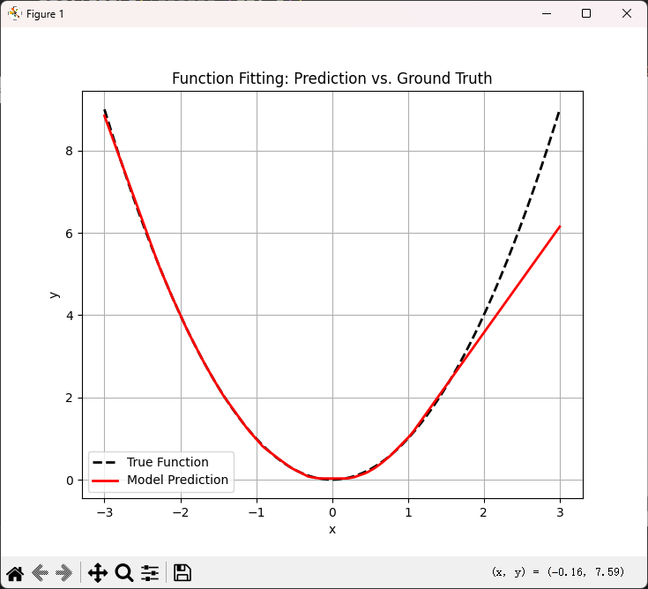